In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# case study #1 - Breast tumor data

In [18]:
df_breast_cancer = pd.read_csv("breast_cancer.csv")
df_breast_cancer.drop(columns = 'Unnamed: 0', axis = 0, inplace = True)

In [19]:
df_breast_cancer.shape

(569, 31)

In [20]:
df_breast_cancer.transpose()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000,12.450000,18.250000,13.710000,13.000000,12.460000,...,11.510000,14.050000,11.200000,15.220000,20.920000,21.560000,20.130000,16.600000,20.600000,7.760000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000,15.700000,19.980000,20.830000,21.820000,24.040000,...,23.930000,27.150000,29.370000,30.620000,25.090000,22.390000,28.250000,28.080000,29.330000,24.540000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000,82.570000,119.600000,90.200000,87.500000,83.970000,...,74.520000,91.380000,70.670000,103.400000,143.000000,142.000000,131.200000,108.300000,140.100000,47.920000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000,477.100000,1040.000000,577.900000,519.800000,475.900000,...,403.500000,600.400000,386.000000,716.900000,1347.000000,1479.000000,1261.000000,858.100000,1265.000000,181.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300,0.127800,0.094630,0.118900,0.127300,0.118600,...,0.092610,0.099290,0.074490,0.104800,0.109900,0.111000,0.097800,0.084550,0.117800,0.052630
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800,0.170000,0.109000,0.164500,0.193200,0.239600,...,0.102100,0.112600,0.035580,0.208700,0.223600,0.115900,0.103400,0.102300,0.277000,0.043620
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000,0.157800,0.112700,0.093660,0.185900,0.227300,...,0.111200,0.044620,0.000000,0.255000,0.317400,0.243900,0.144000,0.092510,0.351400,0.000000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300,0.080890,0.074000,0.059850,0.093530,0.085430,...,0.041050,0.043040,0.000000,0.094290,0.147400,0.138900,0.097910,0.053020,0.152000,0.000000
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900,0.208700,0.179400,0.219600,0.235000,0.203000,...,0.138800,0.153700,0.106000,0.212800,0.214900,0.172600,0.175200,0.159000,0.239700,0.158700
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830,0.076130,0.057420,0.074510,0.073890,0.082430,...,0.065700,0.061710,0.055020,0.071520,0.068790,0.056230,0.055330,0.056480,0.070160,0.058840


In [22]:
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [25]:
df_breast_cancer.loc[[5,6,7],'target']

5    0.0
6    0.0
7    0.0
Name: target, dtype: float64

In [26]:
df_breast_cancer.iloc[:,:]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


## Case Study #3 - Health Insurance

In [27]:
df_insurance = pd.read_csv("insurance.csv")
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

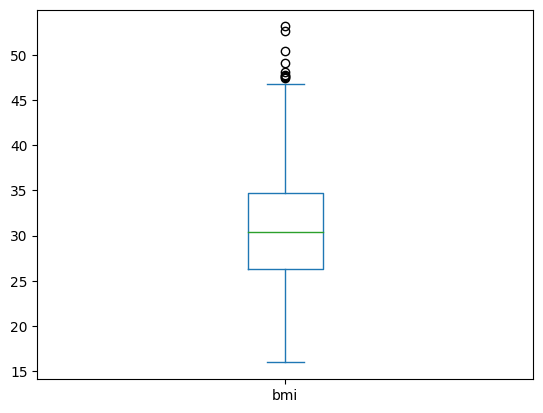

In [32]:
## boxplot


df_insurance['bmi'].plot(kind = 'box')

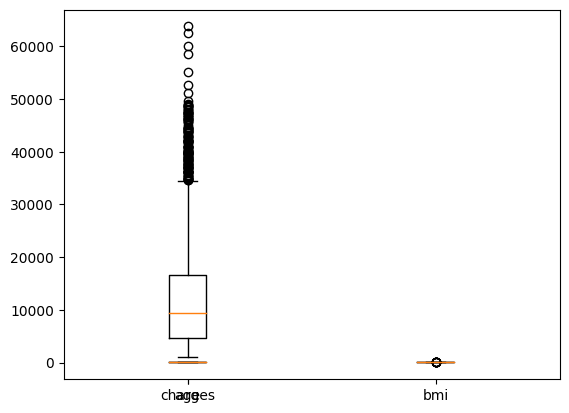

In [48]:
age= df_insurance['age'].to_list()
bmi = df_insurance['bmi'].to_list()
charges = df_insurance['charges'].to_list()


plt.boxplot(x=[age, bmi], labels = ['age', 'bmi'])
plt.boxplot(x=[charges], labels = ['charges'])
plt.show()

In [41]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Case Study #3 - Cancer Genome Atlas

In [69]:
df_clinical = pd.read_csv("TCGA_clinical_features.csv")
df_clinical

,Unnamed: 0,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,...,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,1,TCGA-OR-A5J1,ACC,58.0,MALE,WHITE,Stage II,[Not Applicable],Adrenocortical carcinoma- Usual Type,NaN,...,NaN,1.0,1355.0,1.0,1355.0,1.0,754.0,1.0,754.0,NaN
1,2,TCGA-OR-A5J2,ACC,44.0,FEMALE,WHITE,Stage IV,[Not Applicable],Adrenocortical carcinoma- Usual Type,NaN,...,NaN,1.0,1677.0,1.0,1677.0,NaN,NaN,1.0,289.0,NaN
2,3,TCGA-OR-A5J3,ACC,23.0,FEMALE,WHITE,Stage III,[Not Applicable],Adrenocortical carcinoma- Usual Type,NaN,...,NaN,0.0,2091.0,0.0,2091.0,1.0,53.0,1.0,53.0,NaN
3,4,TCGA-OR-A5J4,ACC,23.0,FEMALE,WHITE,Stage IV,[Not Applicable],Adrenocortical carcinoma- Usual Type,NaN,...,NaN,1.0,423.0,1.0,423.0,NaN,NaN,1.0,126.0,NaN
4,5,TCGA-OR-A5J5,ACC,30.0,MALE,WHITE,Stage III,[Not Applicable],Adrenocortical carcinoma- Usual Type,NaN,...,NaN,1.0,365.0,1.0,365.0,NaN,NaN,1.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,11156,TCGA-YZ-A980,UVM,75.0,MALE,WHITE,Stage IIIA,Stage IIIA,Spindle Cell|Epithelioid Cell,NaN,...,NaN,0.0,1862.0,0.0,1862.0,NaN,NaN,1.0,1556.0,NaN
11156,11157,TCGA-YZ-A982,UVM,79.0,FEMALE,WHITE,Stage IIIB,Stage IIIB,Spindle Cell,NaN,...,NaN,0.0,495.0,0.0,495.0,NaN,NaN,0.0,495.0,NaN
11157,11158,TCGA-YZ-A983,UVM,51.0,FEMALE,WHITE,Stage IIB,Stage IIB,Epithelioid Cell,NaN,...,NaN,0.0,798.0,0.0,798.0,NaN,NaN,0.0,798.0,NaN
11158,11159,TCGA-YZ-A984,UVM,50.0,FEMALE,WHITE,Stage IIB,Stage IIIA,Spindle Cell|Epithelioid Cell,NaN,...,NaN,1.0,1396.0,1.0,1396.0,NaN,NaN,1.0,154.0,NaN


In [75]:
keep_columns = ["bcr_patient_barcode", "OS.time", "age_at_initial_pathologic_diagnosis", "residual_tumor", "ajcc_pathologic_tumor_stage"]

all_columns = df_clinical.columns.to_list()



to_remove_columns = [i for i in all_columns if i not in keep_columns]



In [79]:
print(all_columns)
print()
print(to_remove_columns)

['Unnamed: 0', 'bcr_patient_barcode', 'type', 'age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'clinical_stage', 'histological_type', 'histological_grade', 'initial_pathologic_dx_year', 'menopause_status', 'birth_days_to', 'vital_status', 'tumor_status', 'last_contact_days_to', 'death_days_to', 'cause_of_death', 'new_tumor_event_type', 'new_tumor_event_site', 'new_tumor_event_site_other', 'new_tumor_event_dx_days_to', 'treatment_outcome_first_course', 'margin_status', 'residual_tumor', 'OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction']

['Unnamed: 0', 'type', 'gender', 'race', 'clinical_stage', 'histological_type', 'histological_grade', 'initial_pathologic_dx_year', 'menopause_status', 'birth_days_to', 'vital_status', 'tumor_status', 'last_contact_days_to', 'death_days_to', 'cause_of_death', 'new_tumor_event_type', 'new_tumor_event_site', 'new_tumor_event_site_other', 'new_tumor_event_dx_days_to', 'treatment_out

In [94]:
df_clinical = df_clinical.drop(columns = to_remove_columns, axis = 1)

In [89]:
# remove all rows where OS.time is Null


df_clinical.drop(df_clinical['OS.time'].isnull().index, axis = 0)

,Unnamed: 0,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,...,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction


In [95]:
df_clinical[df_clinical['OS.time'].notna()]

,bcr_patient_barcode,age_at_initial_pathologic_diagnosis,ajcc_pathologic_tumor_stage,residual_tumor,OS.time
0,TCGA-OR-A5J1,58.0,Stage II,NaN,1355.0
1,TCGA-OR-A5J2,44.0,Stage IV,NaN,1677.0
2,TCGA-OR-A5J3,23.0,Stage III,NaN,2091.0
3,TCGA-OR-A5J4,23.0,Stage IV,NaN,423.0
4,TCGA-OR-A5J5,30.0,Stage III,NaN,365.0
...,...,...,...,...,...
11155,TCGA-YZ-A980,75.0,Stage IIIA,NaN,1862.0
11156,TCGA-YZ-A982,79.0,Stage IIIB,NaN,495.0
11157,TCGA-YZ-A983,51.0,Stage IIB,NaN,798.0
11158,TCGA-YZ-A984,50.0,Stage IIB,NaN,1396.0


In [97]:
df_clinical.fillna({'age_at_initial_pathologic_diagnosis': df_clinical['age_at_initial_pathologic_diagnosis'].median()}, inplace= True)

In [98]:
df_clinical

,bcr_patient_barcode,age_at_initial_pathologic_diagnosis,ajcc_pathologic_tumor_stage,residual_tumor,OS.time
0,TCGA-OR-A5J1,58.0,Stage II,NaN,1355.0
1,TCGA-OR-A5J2,44.0,Stage IV,NaN,1677.0
2,TCGA-OR-A5J3,23.0,Stage III,NaN,2091.0
3,TCGA-OR-A5J4,23.0,Stage IV,NaN,423.0
4,TCGA-OR-A5J5,30.0,Stage III,NaN,365.0
...,...,...,...,...,...
11155,TCGA-YZ-A980,75.0,Stage IIIA,NaN,1862.0
11156,TCGA-YZ-A982,79.0,Stage IIIB,NaN,495.0
11157,TCGA-YZ-A983,51.0,Stage IIB,NaN,798.0
11158,TCGA-YZ-A984,50.0,Stage IIB,NaN,1396.0


In [104]:
# drop residual tumor column
df_clinical.drop('residual_tumor', axis=1, inplace = True)

In [106]:
# handling missing value at ajcc_pathologic_tumor_stage


df_clinical.fillna('null_value', inplace = True)

In [109]:
df_clinical.groupby('ajcc_pathologic_tumor_stage').count().reset_index()

,ajcc_pathologic_tumor_stage,bcr_patient_barcode,age_at_initial_pathologic_diagnosis,OS.time
0,I/II NOS,14,14,14
1,IS,46,46,46
2,Stage 0,7,7,7
3,Stage I,1286,1286,1286
4,Stage IA,383,383,383
5,Stage IB,401,401,401
6,Stage II,642,642,642
7,Stage IIA,804,804,804
8,Stage IIB,702,702,702
9,Stage IIC,67,67,67


In [117]:
# one-hot encoding

dummy_df= pd.get_dummies(df_clinical['ajcc_pathologic_tumor_stage'], dtype= int)
dummy_df

,I/II NOS,IS,Stage 0,Stage I,Stage IA,Stage IB,Stage II,Stage IIA,Stage IIB,Stage IIC,...,Stage IIIC,Stage IV,Stage IVA,Stage IVB,Stage IVC,Stage X,[Discrepancy],[Not Applicable],[Unknown],null_value
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11157,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11158,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df_clinical

,bcr_patient_barcode,age_at_initial_pathologic_diagnosis,ajcc_pathologic_tumor_stage,OS.time
0,TCGA-OR-A5J1,58.0,Stage II,1355.0
1,TCGA-OR-A5J2,44.0,Stage IV,1677.0
2,TCGA-OR-A5J3,23.0,Stage III,2091.0
3,TCGA-OR-A5J4,23.0,Stage IV,423.0
4,TCGA-OR-A5J5,30.0,Stage III,365.0
...,...,...,...,...
11155,TCGA-YZ-A980,75.0,Stage IIIA,1862.0
11156,TCGA-YZ-A982,79.0,Stage IIIB,495.0
11157,TCGA-YZ-A983,51.0,Stage IIB,798.0
11158,TCGA-YZ-A984,50.0,Stage IIB,1396.0


In [128]:
df_clinical.drop('ajcc_pathologic_tumor_stage', axis = 1, inplace = True)


In [129]:
df_clinical= pd.merge(df_clinical, dummy_df, left_index = True,right_index = True,how = 'inner')

In [130]:
df_clinical

,bcr_patient_barcode,age_at_initial_pathologic_diagnosis,OS.time,I/II NOS,IS,Stage 0,Stage I,Stage IA,Stage IB,Stage II,...,Stage IIIC,Stage IV,Stage IVA,Stage IVB,Stage IVC,Stage X,[Discrepancy],[Not Applicable],[Unknown],null_value
0,TCGA-OR-A5J1,58.0,1355.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-OR-A5J2,44.0,1677.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,TCGA-OR-A5J3,23.0,2091.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TCGA-OR-A5J4,23.0,423.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,TCGA-OR-A5J5,30.0,365.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,TCGA-YZ-A980,75.0,1862.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11156,TCGA-YZ-A982,79.0,495.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11157,TCGA-YZ-A983,51.0,798.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11158,TCGA-YZ-A984,50.0,1396.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
